# Part 09

## Group by

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
dframe = DataFrame({'k1':['X','X','Y','Y','Z'],
                    'k2':['alpha','beta','alpha','beta','alpha'],
                    'data1':np.arange(5),
                    'data2':np.arange(5)})
dframe

,data1,data2,k1,k2
0,0,0,X,alpha
1,1,1,X,beta
2,2,2,Y,alpha
3,3,3,Y,beta
4,4,4,Z,alpha


Group one column according to a key - in this case *k1*; the resulting object is a series

Note: this syntax/method does not work for more than one key

In [3]:
group1 = dframe['data1'].groupby(dframe['k1'])
group1

In [4]:
group1.mean()

k1
X    0.5
Y    2.5
Z    4.0
Name: data1, dtype: float64

In [5]:
dframe

,data1,data2,k1,k2
0,0,0,X,alpha
1,1,1,X,beta
2,2,2,Y,alpha
3,3,3,Y,beta
4,4,4,Z,alpha


Group all columns by *k1* - the resulting object is a data frame

In [6]:
dframe.groupby('k1')

In [7]:
dframe.groupby('k1').mean() # groupwise mean

,data1,data2
k1,,
X,0.5,0.5
Y,2.5,2.5
Z,4.0,4.0


In [8]:
dframe.groupby(['k1']).size() # groupwise count

k1
X    2
Y    2
Z    1
dtype: int64

In [9]:
dframe.groupby(['k1','k2']).mean() # group all columns by k1 and k2

data1  data2
k1 k2                 
X  alpha      0      0
   beta       1      1
Y  alpha      2      2
   beta       3      3
Z  alpha      4      4

In [10]:
dframe.groupby(['k1','k2']).size()

k1  k2   
X   alpha    1
    beta     1
Y   alpha    1
    beta     1
Z   alpha    1
dtype: int64

In [5]:
cities = np.array(['NY','LA','LA','NY','NY'])
cities

array(['NY', 'LA', 'LA', 'NY', 'NY'], dtype='<U2')

In [6]:
month = np.array(['JAN','FEB','JAN','FEB','JAN'])
month

array(['JAN', 'FEB', 'JAN', 'FEB', 'JAN'], dtype='<U3')

In [7]:
dframe['data1']

0    0
1    1
2    2
3    3
4    4
Name: data1, dtype: int64

In [ ]:
g_ds1 = dframe['data1'].groupby([cities,month])
g_ds1.mean() # grouping by a variable in external series

# Data aggregation

In [8]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [10]:
dframe_wine = pd.read_csv("data/redwines.csv") # read some data

In [11]:
type(dframe_wine)

pandas.core.frame.DataFrame

In [12]:
dframe_wine.head(12)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,pH,sulphates,alcohol,quality
0,6.5,0.90,0.00,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9,6
1,9.1,0.22,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3,6
2,6.9,0.52,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,11.0,5
3,7.3,0.59,0.26,2.0,0.080,17.0,104.0,0.99584,3.28,0.52,9.9,5
4,12.5,0.28,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
5,5.4,0.74,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
6,10.4,0.28,0.54,2.7,0.105,5.0,19.0,0.99880,3.25,0.63,9.5,5
7,7.9,0.40,0.30,1.8,0.157,2.0,45.0,0.99727,3.31,0.91,9.5,6
8,7.3,0.39,0.31,2.4,0.074,9.0,46.0,0.99620,3.41,0.54,9.4,6
9,9.5,0.37,0.52,2.0,0.088,12.0,51.0,0.99613,3.29,0.58,11.1,6


In [14]:
dframe_wine.shape

(1599, 12)

In [13]:
dframe_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_so2', 'total_so2', 'density', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

In [14]:
dframe_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
dframe_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity       1599 non-null float64
volatile_acidity    1599 non-null float64
citric_acid         1599 non-null float64
residual_sugar      1599 non-null float64
chlorides           1599 non-null float64
free_so2            1599 non-null float64
total_so2           1599 non-null float64
density             1599 non-null float64
pH                  1599 non-null float64
sulphates           1599 non-null float64
alcohol             1599 non-null float64
quality             1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
dframe_wine['alcohol'].mean() # aggregating using a built-in function - in this case, mean

10.422983114446508

In [17]:
dframe_wine.alcohol.mean() # same thing

10.422983114446508

#### Writing a user-defined function

In [18]:
def my_mean(a,b):
    m = (a+b)/2
    return m

In [19]:
z = my_mean(2,3)

In [20]:
z

2.5

In [23]:
# creating a user-defined function to aggregate by
def max_to_min(arr):
    '''
    Function to calculate range based on max and min
    inputs: numeric array
    '''
    z = arr.max() - arr.min()
    return z

In [24]:
x = max_to_min(dframe_wine['pH'])
x

1.2699999999999996

In [25]:
wino = dframe_wine.groupby(['quality'])

In [26]:
wino

In [27]:
wino.describe()

alcohol   chlorides  citric_acid     density  fixed_acidity  \
quality                                                                         
3       count   10.000000   10.000000    10.000000   10.000000      10.000000   
        mean     9.955000    0.122500     0.171000    0.997464       8.360000   
        std      0.818009    0.066241     0.250664    0.002002       1.770875   
        min      8.400000    0.061000     0.000000    0.994710       6.700000   
        25%      9.725000    0.079000     0.005000    0.996150       7.150000   
        50%      9.925000    0.090500     0.035000    0.997565       7.500000   
        75%     10.575000    0.143000     0.327500    0.998770       9.875000   
        max     11.000000    0.267000     0.660000    1.000800      11.600000   
4       count   53.000000   53.000000    53.000000   53.000000      53.000000   
        mean    10.265094    0.090679     0.174151    0.996542       7.779245   
        std      0.934776    0.076192     0.201030    0.001575       1.626624   
        min      9.000000    0.045000     0.000000    0.993400       4.600000   
        25%      9.600000    0.067000     0.030000    0.995650       6.800000   
        50%     10.000000    0.080000     0.090000    0.996500       7.500000   
        75%     11.000000    0.089000     0.270000    0.997450       8.400000   
        max     13.100000    0.610000     1.000000    1.001000      12.500000   
5       count  681.000000  681.000000   681.000000  681.000000     681.000000   
        mean     9.899706    0.092736     0.243686    0.997104       8.167254   
        std      0.736521    0.053707     0.180003    0.001589       1.563988   
        min      8.500000    0.039000     0.000000    0.992560       5.000000   
        25%      9.400000    0.074000     0.090000    0.996200       7.100000   
        50%      9.700000    0.081000     0.230000    0.997000       7.800000   
        75%     10.200000    0.094000     0.360000    0.997900       8.900000   
        max     14.900000    0.611000     0.790000    1.003150      15.900000   
6       count  638.000000  638.000000   638.000000  638.000000     638.000000   
        mean    10.629519    0.084956     0.273824    0.996615       8.347179   
        std      1.049639    0.039563     0.195108    0.002000       1.797849   
        min      8.400000    0.034000     0.000000    0.990070       4.700000   
        25%      9.800000    0.068250     0.090000    0.995402       7.000000   
        50%     10.500000    0.078000     0.260000    0.996560       7.900000   
        75%     11.300000    0.088000     0.430000    0.997893       9.400000   
        max     14.000000    0.415000     0.780000    1.003690      14.300000   
7       count  199.000000  199.000000   199.000000  199.000000     199.000000   
        mean    11.465913    0.076588     0.375176    0.996104       8.872362   
        std      0.961933    0.029456     0.194432    0.002176       1.992483   
        min      9.200000    0.012000     0.000000    0.990640       4.900000   
        25%     10.800000    0.062000     0.305000    0.994765       7.400000   
        50%     11.500000    0.073000     0.400000    0.995770       8.800000   
        75%     12.100000    0.087000     0.490000    0.997360      10.100000   
        max     14.000000    0.358000     0.760000    1.003200      15.600000   
8       count   18.000000   18.000000    18.000000   18.000000      18.000000   
        mean    12.094444    0.068444     0.391111    0.995212       8.566667   
        std      1.224011    0.011678     0.199526    0.002378       2.119656   
        min      9.800000    0.044000     0.030000    0.990800       5.000000   
        25%     11.325000    0.062000     0.302500    0.994175       7.250000   
        50%     12.150000    0.070500     0.420000    0.994940       8.250000   
        75%     12.875000    0.075500     0.530000    0.997200      10.225000   
        max     14.000000    0.086000     0.72000

In [24]:
wino.mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


`agg()` is the general container for the aggregation function - in this case the UDF `max_to_min()`...

In [27]:
wino['alcohol'].agg(max_to_min)

quality
3    2.6
4    4.1
5    6.4
6    5.6
7    4.8
8    4.2
Name: alcohol, dtype: float64

...and in this case `mean()`

In [26]:
wino.agg('mean')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [28]:
wino['alcohol'].agg(max_to_min)

quality
3    2.6
4    4.1
5    6.4
6    5.6
7    4.8
8    4.2
Name: alcohol, dtype: float64

In [29]:
dframe_wine['qual_alc_ratio'] = dframe_wine['quality']/dframe_wine['alcohol']
dframe_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,pH,sulphates,alcohol,quality,qual_alc_ratio
0,6.5,0.90,0.00,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9,6,0.550459
1,9.1,0.22,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3,6,0.582524
2,6.9,0.52,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,11.0,5,0.454545
3,7.3,0.59,0.26,2.0,0.080,17.0,104.0,0.99584,3.28,0.52,9.9,5,0.505051
4,12.5,0.28,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7,0.714286


#### We can also use achieve the same thing with a pivot table instead of groupby

In [32]:
%matplotlib inline

`%matplotlib` is a "magic" command - in this case, it invokes the backend "inline"; with this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document

More details in the *matplotlib* <a href = 'http://ipython.readthedocs.io/en/stable/interactive/plotting.html'>documentation page</a>

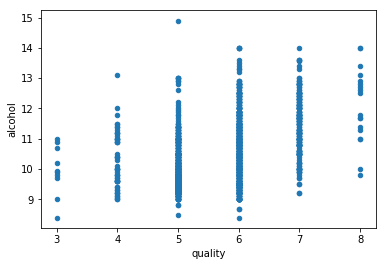

In [33]:
dframe_wine.plot(kind = 'scatter', x = 'quality', y = 'alcohol')

## Split-apply-combine

In [34]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [35]:
from IPython.display import Image

In [36]:
Image(filename='./images_data_etc/images/SAC.png',height = 640, width = 480)

FileNotFoundError: [Errno 2] No such file or directory: './images_data_etc/images/SAC.png'

In [38]:
dframe_wine = pd.read_csv("data/redwines.csv")

In [39]:
dframe_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,pH,sulphates,alcohol,quality
0,6.5,0.90,0.00,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9,6
1,9.1,0.22,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3,6
2,6.9,0.52,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,11.0,5
3,7.3,0.59,0.26,2.0,0.080,17.0,104.0,0.99584,3.28,0.52,9.9,5
4,12.5,0.28,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7


In [40]:
len(dframe_wine)

1599

In [41]:
dframe_wine.shape

(1599, 12)

For each <i>quality</i>, we'll find the wine with the highest <i>alcohol</i> content

In [42]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
np.arange(10) + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [44]:
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) + 1
    return df

In [45]:
dframe_wine.sort_values('alcohol',ascending = False,inplace = True)

In [46]:
dframe_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,pH,sulphates,alcohol,quality
995,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
613,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
91,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,6
1514,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8
170,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7


In [47]:
dframe_wine.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,pH,sulphates,alcohol,quality
801,8.2,0.42,0.49,2.6,0.084,32.0,55.0,0.99880,3.34,0.75,8.7,6
462,7.9,0.24,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,6
1253,10.0,0.38,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,5
736,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
505,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6


In [48]:
dframe_wine['alcohol'].max()

14.9

In [49]:
dframe_wine['alcohol'].min()

8.4

In [50]:
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

### The <i>groupby</i> does the splitting and the combining; the <i>apply</i> does the applying (!)

In [51]:
dframe_wine.head(25)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,pH,sulphates,alcohol,quality,alc_content_rank
995,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5,1
613,5.0,0.420,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8,1
91,8.8,0.460,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6,1
1514,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8,2
170,4.9,0.420,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7,1
861,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6,2
327,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,3
428,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,4
680,5.1,0.420,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7,2
677,5.0,0.400,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6,5


In [52]:
num_of_qual = dframe_wine['quality'].value_counts()
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [53]:
dframe_wine[dframe_wine.alc_content_rank==1]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,pH,sulphates,alcohol,quality,alc_content_rank
995,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
613,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
91,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,6,1
170,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,1
1044,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,1
987,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,1


# End of part 09